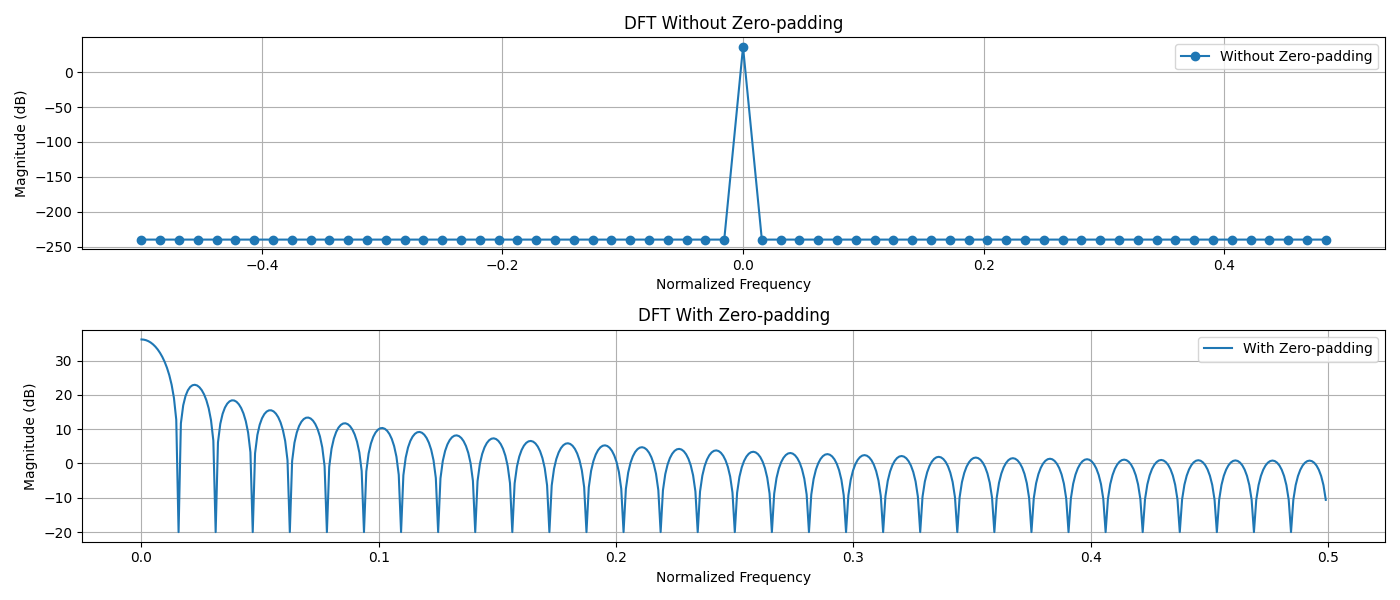

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
# 原始窗长度
N = 64

# 插值后的FFT长度（用于频谱细化显示）
zero_padding = 1024

# 构建矩形窗
window = np.ones(N)

# ==========================
# 1. 直接 DFT（无插值）
# ==========================
W_raw = np.fft.fft(window, n=N)
W_raw_shifted = np.fft.fftshift(W_raw)
freq_raw = np.fft.fftshift(np.fft.fftfreq(N, d=1.0))

# ==========================
# 2. 零填充 DFT（频谱细化）
# ==========================
W_interp = np.fft.fft(window, n=zero_padding)
W_interp_shifted = np.fft.fftshift(W_interp)
freq_interp = np.fft.fftshift(np.fft.fftfreq(zero_padding, d=1.0))

# ==========================
# 绘图对比
# ==========================
plt.figure(figsize=(14, 6))

# 插值前频谱
plt.subplot(2, 1, 1)
plt.plot(freq_raw, 20 * np.log10(np.abs(W_raw_shifted) + 1e-12), 'o-', label="Without Zero-padding")
plt.title("DFT Without Zero-padding")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.legend()

l = len(freq_interp)//2
# 插值后频谱
plt.subplot(2, 1, 2)
plt.plot(freq_interp[l:], 20 * np.log10(np.abs(W_interp_shifted) + 1e-1)[l:], label="With Zero-padding")
plt.title("DFT With Zero-padding")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
fs = 500
fin = 48.8*2
N = 1024
t = np.arange(N)

d = np.sin(2*np.pi*fin/fs*t)

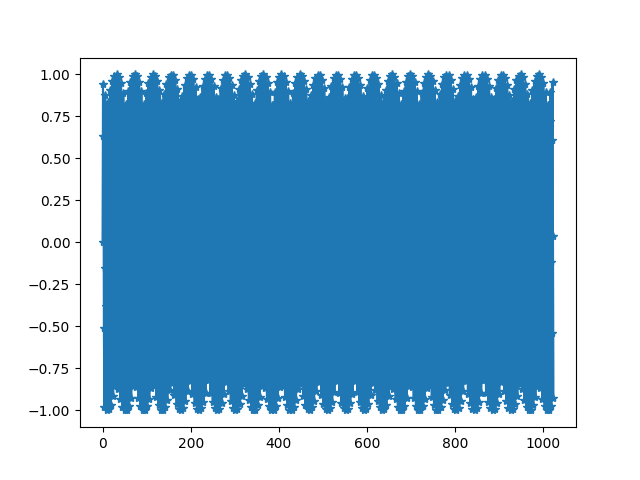

In [30]:
fig = plt.figure()
subfig = fig.add_subplot(111)
subfig.plot(d, marker='*')

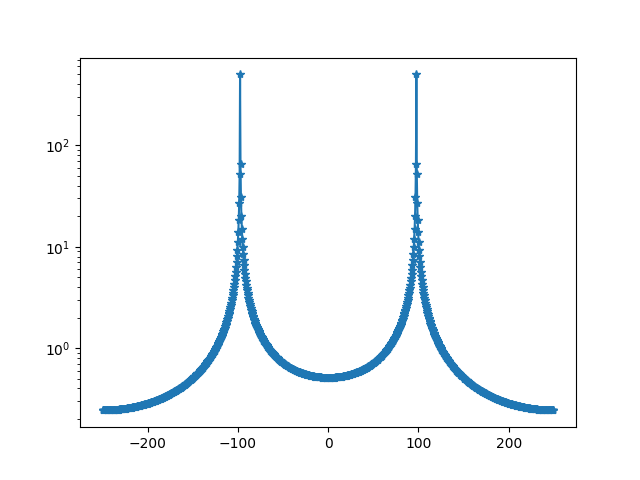

In [31]:
fig1 = plt.figure()
subfig1 = fig1.add_subplot(111)
dfft = np.fft.fft(d)
dfft_shift = np.fft.fftshift(dfft)
freq = np.fft.fftfreq(N,1/fs)
freq_shift = np.fft.fftshift(freq)
subfig1.plot(freq_shift, np.abs(dfft_shift), marker='*')
subfig1.set_yscale('log')


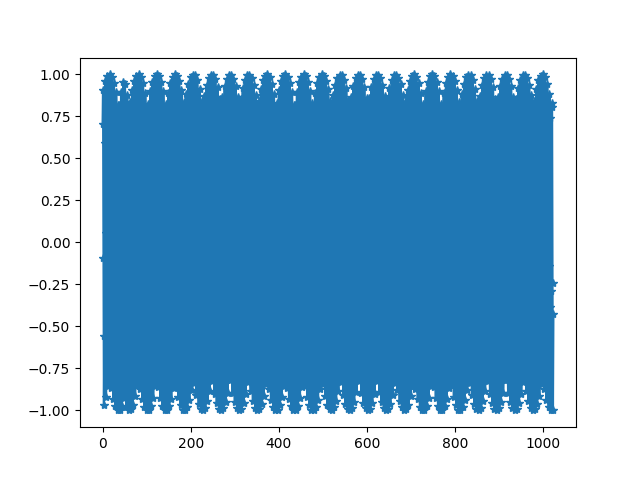

In [32]:
dn = np.zeros(N)
shift = 50
dn[shift:] = d[:-shift]
dn[:shift] = d[-shift:]

fig2 = plt.figure()
subfig2 = fig2.add_subplot(111)
subfig2.plot(dn, marker='*')

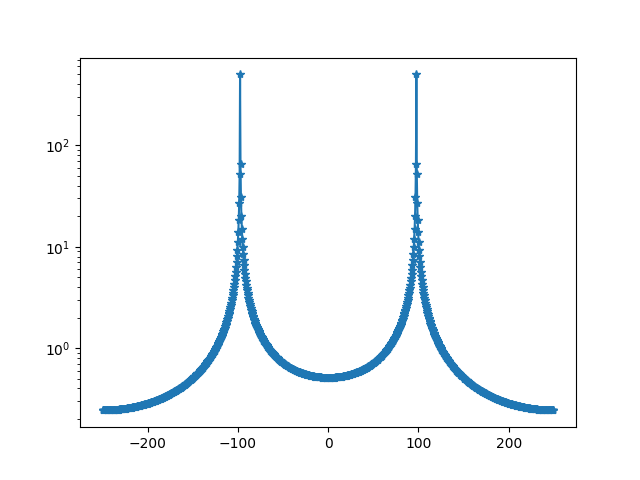

In [33]:
fig3 = plt.figure()
subfig3 = fig3.add_subplot(111)
dfft = np.fft.fft(d)
dfft_shift = np.fft.fftshift(dfft)
freq = np.fft.fftfreq(N,1/fs)
freq_shift = np.fft.fftshift(freq)
subfig3.plot(freq_shift, np.abs(dfft_shift), marker='*')
subfig3.set_yscale('log')